In this notebook, I implement a Dense and and a Convolution Neural netwotk to compare the different accuracy.

The dataset and the code for the maps are from this github repo : https://github.com/ShawnHymel/computer-vision-with-embedded-machine-learning/tree/master

In [ ]:
import os
import PIL
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Dataset creation

In [ ]:
labeldic={"background":0,"capacitor":1,"diode":2,"led":3,"resistor":4}
labels=["background","capacitor","diode","led","resistor"]

In [ ]:
dataset_path = "dataset"

X=[]
y=[]

for subdir, dirs, files in os.walk(dataset_path):
  for file in files:
    #print os.path.join(subdir, file)
    filepath = subdir + os.sep + file

    if filepath !=".ipynb_checkpoints":
      img = PIL.Image.open(filepath).convert("L")

      img = np.asarray(img)

      X.append(img)
      y.append(labeldic[subdir.split("/")[1]])


In [ ]:
print(y)
len(X)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


250

In [ ]:
import random
# select n element for the train dataset

list = range(0,len(X))
# initializing the value of n
n = int(0.8*len(list))

# printing n elements from list
train_values=random.sample(list, n)

X_train=[]
y_train=[]

X_test=[]
y_test=[]

for i in range(len(X)):
  if i in train_values:
    X_train.append(X[i])
    y_train.append(y[i])
  else:
    X_test.append(X[i])
    y_test.append(y[i])

print(f"number of X_train {len(X_train)}")
print(f"number of X_test {len(X_test)}")

number of X_train 200
number of X_test 50


1


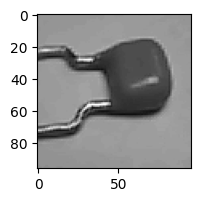

In [ ]:
# show an image
plt.figure(figsize=(3,2))
print(y_train[0])
plt.imshow(X_train[0],cmap="gray",vmin=0, vmax=255)

In [ ]:
from skimage.transform import resize

#lower the pixels in images
# the reshape pass the values into 0.X values, not need to divide by 255

X_train = [resize(image,(28,28)) for image in X_train]
X_test = [resize(image,(28,28)) for image in X_test]



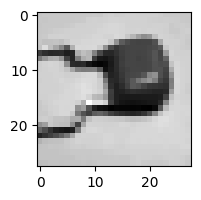

In [ ]:
plt.figure(figsize=(3,2))
plt.imshow(X_train[0],cmap="gray")

In [ ]:
# pass Xtrain to an array

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [ ]:
#Passing the y_train into a one hot encoding
from keras import utils

Y_train = utils.to_categorical(y_train,len(labeldic))
Y_test = utils.to_categorical(y_test,len(labeldic))

print(y_train[0],Y_train[0])

1 [0. 1. 0. 0. 0.]


In [ ]:
# deviding by 255
#X_train = X_train/255
#X_test = X_test/255

# Dense model creation

In [ ]:
X_train.shape

(200, 28, 28)

In [ ]:
# creating the model

from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Dense(len(labeldic)))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["acc"])

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
history = model.fit(X_train,Y_train,epochs=200,batch_size=32)

Epoch 1/200
7/7 [==============================] - 4s 9ms/step - loss: 1.6335 - acc: 0.2500
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 1.5147 - acc: 0.3300
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 1.4679 - acc: 0.3900
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 1.3729 - acc: 0.4350
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 1.3807 - acc: 0.4150
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 1.3238 - acc: 0.4800
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 1.2983 - acc: 0.4400
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 1.1403 - acc: 0.5700
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 1.1296 - acc: 0.5750
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 1.0827 - acc: 0.5700
Epoch 11/200
7/7 [==============================] - 0s 8ms/step - loss: 1.

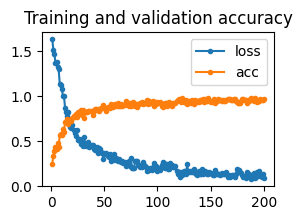

In [ ]:
# plot the graphs
plt.figure(figsize=(3,2))

loss = history.history["loss"]
acc = history.history["acc"]

epocs = range(1,len(loss)+1)

plt.plot(epocs,loss,marker=".",label="loss")
plt.plot(epocs,acc,marker=".",label="acc")
plt.title('Training and validation accuracy')
plt.legend()


In [ ]:
# confusion matrics

from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)
Y_pred = np.argmax(predictions,axis=1)

cm = confusion_matrix(y_test,Y_pred)
cm = np.transpose(cm)
cm

2/2 [==============================] - 0s 6ms/step


array([[ 9,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  1],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  1,  0, 12]])

[30, 45, 3, 38, 10, 17, 16, 8, 5, 19]


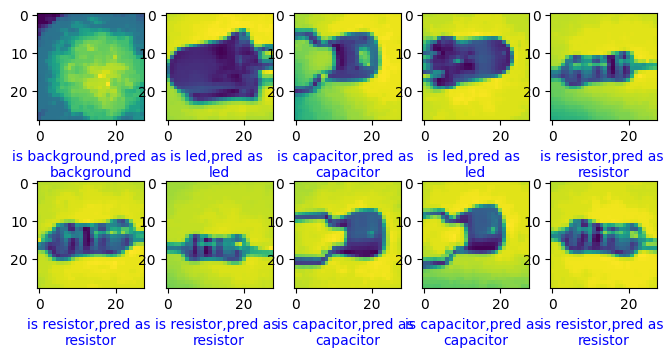

In [ ]:
# plot

random_values=random.sample(range(0,len(X_test)), 10)
print(random_values)

plt.figure(figsize=(8,4))


for i,value in enumerate(random_values):
  plt.subplot(2,5,i+1)

  prediction = labels[np.argmax(predictions[value])]
  real = labels[y_test[value]]

  if prediction==real:
    color="blue"
  else:
    color="red"

  plt.imshow(X_test[value])
  plt.xlabel(f"is {real},pred as \n{prediction}",color=color)




In [ ]:
#evaluate
score = model.evaluate(X_test, Y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2/2 [==============================] - 0s 10ms/step - loss: 0.1268 - acc: 0.9600
Test loss: 0.1268373429775238
Test accuracy: 0.9599999785423279


# Test with a Conv2d

In [ ]:
X_train = X_train.reshape(-1,28,28,1)

In [ ]:
X_train.shape

(200, 28, 28, 1)

In [ ]:
# creating the model

from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(4, kernel_size=(3,3), strides=1, padding="same", activation="relu")) #input_shape (28,28)
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="same")) #input_shape= (28,28,4)

model.add(Conv2D(2, kernel_size=(3,3), strides=1, padding="same", activation="relu")) #input_shape=(14,14,4)
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="same")) #input_shape= (14,14,2)

model.add(Flatten()) #input_shape (7,7,2)

model.add(Dense(5,activation='softmax'))


model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["acc"])


In [ ]:
history = model.fit(X_train,Y_train,epochs=200,batch_size=32)

Epoch 1/200
7/7 [==============================] - 2s 22ms/step - loss: 1.6222 - acc: 0.2200
Epoch 2/200
7/7 [==============================] - 0s 19ms/step - loss: 1.6126 - acc: 0.2200
Epoch 3/200
7/7 [==============================] - 0s 22ms/step - loss: 1.6042 - acc: 0.2200
Epoch 4/200
7/7 [==============================] - 0s 19ms/step - loss: 1.5940 - acc: 0.2200
Epoch 5/200
7/7 [==============================] - 0s 21ms/step - loss: 1.5868 - acc: 0.2200
Epoch 6/200
7/7 [==============================] - 0s 18ms/step - loss: 1.5822 - acc: 0.2300
Epoch 7/200
7/7 [==============================] - 0s 19ms/step - loss: 1.5764 - acc: 0.2450
Epoch 8/200
7/7 [==============================] - 0s 18ms/step - loss: 1.5706 - acc: 0.2450
Epoch 9/200
7/7 [==============================] - 0s 18ms/step - loss: 1.5646 - acc: 0.2500
Epoch 10/200
7/7 [==============================] - 0s 21ms/step - loss: 1.5573 - acc: 0.2600
Epoch 11/200
7/7 [==============================] - 0s 19ms/step - lo

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 4)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 2)         74        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 2)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 98)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                

In [ ]:
#evaluate
score = model.evaluate(X_test, Y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2/2 [==============================] - 0s 19ms/step - loss: 0.2068 - acc: 0.9400
Test loss: 0.20680181682109833
Test accuracy: 0.9399999976158142


# CNN Vizualisation

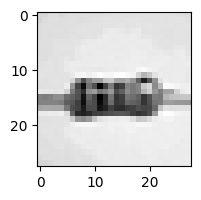

In [ ]:
img = [0.5536, 0.5497, 0.5702, 0.5719, 0.5608, 0.5702, 0.5758, 0.5719, 0.5758, 0.5758, 0.5758, 0.5742, 0.5781, 0.5804, 0.5827, 0.5815, 0.5811, 0.5792, 0.5820, 0.5838, 0.5850, 0.5834, 0.5815, 0.5845, 0.5827, 0.5799, 0.5781, 0.5735, 0.5497, 0.5663, 0.5758, 0.5758, 0.5696, 0.5719, 0.5758, 0.5719, 0.5735, 0.5758, 0.5765, 0.5804, 0.5834, 0.5834, 0.5834, 0.5822, 0.5845, 0.5850, 0.5862, 0.5822, 0.5815, 0.5822, 0.5845, 0.5815, 0.5845, 0.5850, 0.5850, 0.5776, 0.5663, 0.5758, 0.5758, 0.5719, 0.5735, 0.5758, 0.5742, 0.5776, 0.5792, 0.5804, 0.5827, 0.5834, 0.5850, 0.5875, 0.5880, 0.5899, 0.5834, 0.5875, 0.5915, 0.5880, 0.5891, 0.5843, 0.5840, 0.5859, 0.5845, 0.5822, 0.5845, 0.5840, 0.5702, 0.5758, 0.5719, 0.5758, 0.5742, 0.5719, 0.5765, 0.5827, 0.5850, 0.5834, 0.5834, 0.5811, 0.5977, 0.6049, 0.6026, 0.5967, 0.5900, 0.5991, 0.6032, 0.5829, 0.5886, 0.5863, 0.5838, 0.5822, 0.5811, 0.5850, 0.5854, 0.5820, 0.5696, 0.5735, 0.5719, 0.5719, 0.5730, 0.5765, 0.5827, 0.5811, 0.5811, 0.5862, 0.5834, 0.5922, 0.6072, 0.6055, 0.6055, 0.6044, 0.6049, 0.6072, 0.6032, 0.5931, 0.5931, 0.5850, 0.5845, 0.5804, 0.5822, 0.5843, 0.5865, 0.5831, 0.5735, 0.5719, 0.5758, 0.5822, 0.5815, 0.5827, 0.5834, 0.5850, 0.5954, 0.6032, 0.6028, 0.6072, 0.6049, 0.6032, 0.6037, 0.6055, 0.6055, 0.6055, 0.6049, 0.6049, 0.6026, 0.5905, 0.5815, 0.5850, 0.5838, 0.5854, 0.5870, 0.5829, 0.5742, 0.5735, 0.5758, 0.5834, 0.5850, 0.5850, 0.5815, 0.5961, 0.6083, 0.6049, 0.6049, 0.6032, 0.6032, 0.6049, 0.6055, 0.6037, 0.6055, 0.6072, 0.6032, 0.6032, 0.6049, 0.5958, 0.5891, 0.5820, 0.5842, 0.5956, 0.5991, 0.5849, 0.5735, 0.5735, 0.5742, 0.5827, 0.5811, 0.5811, 0.5815, 0.5981, 0.6049, 0.6009, 0.6055, 0.6078, 0.6049, 0.6055, 0.6072, 0.6072, 0.6049, 0.6095, 0.6101, 0.6072, 0.6009, 0.6026, 0.6049, 0.5970, 0.5928, 0.6049, 0.6067, 0.5894, 0.5758, 0.5735, 0.5804, 0.5811, 0.5866, 0.5917, 0.5854, 0.5975, 0.6049, 0.6055, 0.6055, 0.6072, 0.6072, 0.6095, 0.6037, 0.6049, 0.6072, 0.6136, 0.6136, 0.6124, 0.6060, 0.6078, 0.6078, 0.6095, 0.6049, 0.6032, 0.6072, 0.5993, 0.5804, 0.5822, 0.5850, 0.5811, 0.5863, 0.6014, 0.6067, 0.6067, 0.6055, 0.6055, 0.6067, 0.6067, 0.6044, 0.6067, 0.6067, 0.6090, 0.6136, 0.6136, 0.6120, 0.6081, 0.6097, 0.6124, 0.6136, 0.6083, 0.6037, 0.6067, 0.6055, 0.6072, 0.5822, 0.5850, 0.5850, 0.5811, 0.5871, 0.6021, 0.6044, 0.5998, 0.5975, 0.6014, 0.5975, 0.5958, 0.5993, 0.6051, 0.5993, 0.6062, 0.6101, 0.6122, 0.6306, 0.6428, 0.6287, 0.6150, 0.6032, 0.6044, 0.6032, 0.6060, 0.6049, 0.6009, 0.5850, 0.5822, 0.5822, 0.5834, 0.5850, 0.5862, 0.6007, 0.6255, 0.6336, 0.6151, 0.6309, 0.6505, 0.6334, 0.6336, 0.6542, 0.6572, 0.6388, 0.6270, 0.5476, 0.4665, 0.5099, 0.5876, 0.6102, 0.6032, 0.6044, 0.6067, 0.6067, 0.5986, 0.5799, 0.5781, 0.5827, 0.5850, 0.5815, 0.5862, 0.5517, 0.3781, 0.2192, 0.3420, 0.4005, 0.4060, 0.4991, 0.5137, 0.4310, 0.4207, 0.4463, 0.3916, 0.2547, 0.0898, 0.2204, 0.3795, 0.5794, 0.6131, 0.6062, 0.6078, 0.6055, 0.6009, 0.5757, 0.5780, 0.5803, 0.5820, 0.5805, 0.6075, 0.3876, 0.1835, 0.0399, 0.2985, 0.2197, 0.0139, 0.1731, 0.3261, 0.1489, 0.1767, 0.3422, 0.3198, 0.3476, 0.5168, 0.5582, 0.3599, 0.4792, 0.6490, 0.6372, 0.6266, 0.6157, 0.6153, 0.6008, 0.5988, 0.5937, 0.5815, 0.5922, 0.5418, 0.3256, 0.2231, 0.1299, 0.3781, 0.4072, 0.3059, 0.3375, 0.3961, 0.2047, 0.2526, 0.3623, 0.3195, 0.3432, 0.4702, 0.5333, 0.3945, 0.3316, 0.4202, 0.4269, 0.5429, 0.6038, 0.6160, 0.3374, 0.3295, 0.3386, 0.3707, 0.3733, 0.2852, 0.2560, 0.2133, 0.0585, 0.2619, 0.1949, 0.0106, 0.1203, 0.3086, 0.1467, 0.1673, 0.3037, 0.2887, 0.2583, 0.1448, 0.2198, 0.3257, 0.3154, 0.4693, 0.4956, 0.5046, 0.5136, 0.5140, 0.3459, 0.3465, 0.3447, 0.3461, 0.3315, 0.2495, 0.2328, 0.1714, 0.0491, 0.2280, 0.2032, 0.0356, 0.1313, 0.2869, 0.1546, 0.1676, 0.2735, 0.2596, 0.2374, 0.1442, 0.2082, 0.3044, 0.3166, 0.4060, 0.4084, 0.3964, 0.3924, 0.3882, 0.4320, 0.4375, 0.4345, 0.4321, 0.4292, 0.3104, 0.2058, 0.1785, 0.0831, 0.2038, 0.2002, 0.0634, 0.1012, 0.1788, 0.1286, 0.1219, 0.1668, 0.1766, 0.2123, 0.1878, 0.1933, 0.2740, 0.5056, 0.5809, 0.5736, 0.5758, 0.5742, 0.5726, 0.6038, 0.6038, 0.6072, 0.6065, 0.6158, 0.5636, 0.2647, 0.1153, 0.0912, 0.1179, 0.1702, 0.1787, 0.2035, 0.2151, 0.2285, 0.2401, 0.2233, 0.1741, 0.1466, 0.1593, 0.2002, 0.3985, 0.6271, 0.6503, 0.6452, 0.6270, 0.6203, 0.6215, 0.5783, 0.5783, 0.5806, 0.5819, 0.5819, 0.5877, 0.5240, 0.3872, 0.3661, 0.4013, 0.5094, 0.5794, 0.5998, 0.6111, 0.6070, 0.6139, 0.6102, 0.5721, 0.5139, 0.5248, 0.5613, 0.6043, 0.6180, 0.6284, 0.6268, 0.6124, 0.6124, 0.6124, 0.5838, 0.5838, 0.5834, 0.5850, 0.5815, 0.5896, 0.6131, 0.6318, 0.6329, 0.6341, 0.6309, 0.6169, 0.6125, 0.6213, 0.6187, 0.6203, 0.6234, 0.6278, 0.6340, 0.6340, 0.6296, 0.6175, 0.6136, 0.6136, 0.6136, 0.6147, 0.6118, 0.6078, 0.5799, 0.5850, 0.5850, 0.5811, 0.5850, 0.6032, 0.6032, 0.6005, 0.6097, 0.6097, 0.6074, 0.6090, 0.6099, 0.6173, 0.6101, 0.6124, 0.6236, 0.6215, 0.6167, 0.6136, 0.6148, 0.6136, 0.6141, 0.6164, 0.6164, 0.6129, 0.6136, 0.6118, 0.5735, 0.5799, 0.5850, 0.5811, 0.5836, 0.5998, 0.6072, 0.6055, 0.6078, 0.6083, 0.6055, 0.6072, 0.6096, 0.6115, 0.6060, 0.6118, 0.6159, 0.6136, 0.6129, 0.6160, 0.6164, 0.6164, 0.6136, 0.6141, 0.6164, 0.6124, 0.6095, 0.6072, 0.5742, 0.5735, 0.5804, 0.5834, 0.5827, 0.5878, 0.5942, 0.6072, 0.6095, 0.6032, 0.6049, 0.6037, 0.6067, 0.6067, 0.6044, 0.6106, 0.6152, 0.6106, 0.6101, 0.6141, 0.6141, 0.6141, 0.6152, 0.6129, 0.6129, 0.6118, 0.6037, 0.6049, 0.5719, 0.5719, 0.5758, 0.5827, 0.5845, 0.5788, 0.5822, 0.5903, 0.5998, 0.6072, 0.6032, 0.6055, 0.6072, 0.6060, 0.6037, 0.6067, 0.6072, 0.6049, 0.6101, 0.6147, 0.6141, 0.6106, 0.6136, 0.6164, 0.6072, 0.6037, 0.6072, 0.6072, 0.5758, 0.5758, 0.5719, 0.5742, 0.5769, 0.5758, 0.5804, 0.5811, 0.5862, 0.5926, 0.6026, 0.6072, 0.6032, 0.6044, 0.6055, 0.6049, 0.6072, 0.6032, 0.6049, 0.6118, 0.6147, 0.6090, 0.6049, 0.6078, 0.6055, 0.6049, 0.6055, 0.6049, 0.5592, 0.5719, 0.5758, 0.5735, 0.5742, 0.5723, 0.5758, 0.5827, 0.5742, 0.5776, 0.5926, 0.6032, 0.6072, 0.6037, 0.6072, 0.6055, 0.6055, 0.6049, 0.6009, 0.6032, 0.6095, 0.6095, 0.6032, 0.6049, 0.6072, 0.6055, 0.6049, 0.6072, 0.5497, 0.5536, 0.5608, 0.5719, 0.5758, 0.5719, 0.5758, 0.5811, 0.5781, 0.5746, 0.5811, 0.5905, 0.6014, 0.6032, 0.6055, 0.6049, 0.6032, 0.6049, 0.6032, 0.6055, 0.6049, 0.6060, 0.6072, 0.6009, 0.6032, 0.6072, 0.6055, 0.6049]
true_idx = 4  # Resistor

img_reshape = np.asarray(img).reshape((28,28))
# or np.reshape(np.array(img),(28,28))

plt.figure(figsize=(3,2))
plt.imshow(img_reshape,cmap="gray")


In [ ]:
img_reshape = np.asarray(img).reshape((28,28,1))

images = np.array([img_reshape])

print(images.shape)

preds = model.predict(images)

for i, pred in enumerate(preds[0]):
  print(labels[i],pred)

(1, 28, 28, 1)
1/1 [==============================] - 0s 70ms/step
background 8.377025e-05
capacitor 0.0014840745
diode 0.44152966
led 0.0038893155
resistor 0.55301315


In [ ]:
### For either algorithm, we need to remove the Softmax activation function of the last layer
model.layers[-1].activation = None

In [ ]:
### Saliency Map

### Based on: https://github.com/keisen/tf-keras-vis/blob/master/tf_keras_vis/saliency.py
def get_saliency_map(img_array, model, class_idx):

  # Gradient calculation requires input to be a tensor
  img_tensor = tf.convert_to_tensor(img_array)

  # Do a forward pass of model with image and track the computations on the "tape"
  with tf.GradientTape(watch_accessed_variables=False, persistent=True) as tape:

    # Compute (non-softmax) outputs of model with given image
    tape.watch(img_tensor)
    outputs = model(img_tensor, training=False)

    # Get score (predicted value) of actual class
    score = outputs[:, true_idx]

  # Compute gradients of the loss with respect to the input image
  grads = tape.gradient(score, img_tensor)

  # Finds max value in each color channel of the gradient (should be grayscale for this demo)
  grads_disp = [np.max(g, axis=-1) for g in grads]

  # There should be only one gradient heatmap for this demo
  grad_disp = grads_disp[0]

  # The absolute value of the gradient shows the effect of change at each pixel
  # Source: https://christophm.github.io/interpretable-ml-book/pixel-attribution.html
  grad_disp = tf.abs(grad_disp)

  # Normalize to between 0 and 1 (use epsilon, a very small float, to prevent divide-by-zero error)
  heatmap_min = np.min(grad_disp)
  heatmap_max = np.max(grad_disp)
  heatmap = (grad_disp - heatmap_min) / (heatmap_max - heatmap_min + tf.keras.backend.epsilon())

  return heatmap.numpy()

In [ ]:
### Generate saliency map for the given input image
saliency_map = get_saliency_map(images, model, true_idx)

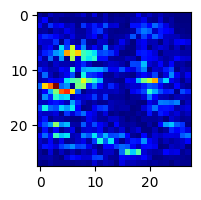

In [ ]:
### Draw map
plt.figure(figsize=(3,2))
plt.imshow(saliency_map, cmap='jet', vmin=0.0, vmax=1.0)

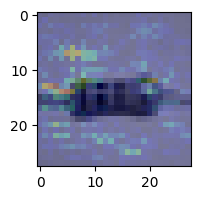

In [ ]:
### Overlay the saliency map on top of the original input image
plt.figure(figsize=(3,2))
idx = 0
ax = plt.subplot()
ax.imshow(images[idx,:,:,0], cmap='gray', vmin=0.0, vmax=1.0)
ax.imshow(saliency_map, cmap='jet', alpha=0.25)

In [ ]:
### Grad-CAM
### This function comes from https://keras.io/examples/vision/grad_cam/
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):

  # First, we create a model that maps the input image to the activations
  # of the last conv layer as well as the output predictions
  grad_model = tf.keras.models.Model(
      [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
  )

  # Then, we compute the gradient of the top predicted class for our input image
  # with respect to the activations of the last conv layer
  with tf.GradientTape() as tape:
      last_conv_layer_output, preds = grad_model(img_array)
      if pred_index is None:
          pred_index = tf.argmax(preds[0])
      class_channel = preds[:, pred_index]

  # This is the gradient of the output neuron (top predicted or chosen)
  # with regard to the output feature map of the last conv layer
  grads = tape.gradient(class_channel, last_conv_layer_output)

  # This is a vector where each entry is the mean intensity of the gradient
  # over a specific feature map channel
  pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the top predicted class
  # then sum all the channels to obtain the heatmap class activation
  last_conv_layer_output = last_conv_layer_output[0]
  heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
  heatmap = tf.squeeze(heatmap)

  # The absolute value of the gradient shows the effect of change at each pixel
  # Source: https://christophm.github.io/interpretable-ml-book/pixel-attribution.html
  heatmap = tf.abs(heatmap)

  # Normalize to between 0 and 1 (use epsilon, a very small float, to prevent divide-by-zero error)
  heatmap_min = np.min(heatmap)
  heatmap_max = np.max(heatmap)
  heatmap = (heatmap - heatmap_min) / (heatmap_max - heatmap_min + tf.keras.backend.epsilon())

  return heatmap.numpy()

In [ ]:
### We need to tell Grad-CAM where to find the last convolution layer

# Print out the layers in the model
for layer in model.layers:
  print(layer, layer.name)

# Go backwards through the model to find the last convolution layer
last_conv_layer = None
for layer in reversed(model.layers):
    if 'conv' in layer.name:
        last_conv_layer = layer.name
        break

# Give a warning if the last convolution layer could not be found
if last_conv_layer is not None:
  print("Last convolution layer found:", last_conv_layer)
else:
  print("ERROR: Last convolution layer could not be found. Do not continue.")

<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c3f906b8160> conv2d
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7c3f90575e70> max_pooling2d
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c3f9059a0e0> conv2d_1
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7c3f90577760> max_pooling2d_1
<keras.src.layers.reshaping.flatten.Flatten object at 0x7c3f90576e30> flatten_1
<keras.src.layers.core.dense.Dense object at 0x7c3f90577610> dense_3
Last convolution layer found: conv2d_1


In [ ]:
### Generate class activation heatmap
heatmap = make_gradcam_heatmap(images, model, last_conv_layer)

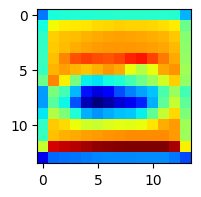

In [ ]:
### Draw map
plt.figure(figsize=(3,2))
plt.imshow(heatmap, cmap='jet', vmin=0.0, vmax=1.0)

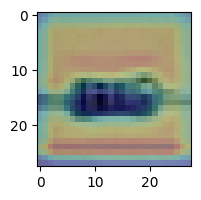

In [ ]:
### Overlay the saliency map on top of the original input image
plt.figure(figsize=(3,2))
# The heatmap is a lot smaller than the original image, so we upsample it
big_heatmap = cv2.resize(heatmap, dsize=(28,28), interpolation=cv2.INTER_CUBIC)

# Draw original image with heatmap superimposed over it
idx = 0
ax = plt.subplot()
ax.imshow(images[idx,:,:,0], cmap='gray', vmin=0.0, vmax=1.0)
ax.imshow(big_heatmap, cmap='jet', alpha=0.25)